# Multiple Regression

Simple Linear Regression:

$$y = \beta_0 + \beta_1X$$

Multiple Linear Regression:

$$y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ...$$

Well studied field in statistics

Focus will be on what is relevant for Data Science - practical and relevant for prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [3]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.22.4
1.5.3
3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]
1.2.2


In [6]:
# from sklearn.datasets import load_boston

In [46]:
# boston_data = load_boston()
df = pd.read_csv("housing.data", delim_whitespace=True, header=None)

In [24]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name

In [25]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [26]:
df.shape

(506, 14)

In [27]:
X = df

In [28]:
y = boston_data.target

NameError: name 'boston_data' is not defined

In [ ]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Statsmodels

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

We need to add a constant term to allow statsmodel.api to calculate the bias / intercepts.

$y = mX$

$y = mX + c$

In [30]:
X_constant = sm.add_constant(X)

In [31]:
pd.DataFrame(X_constant)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [35]:
sm.OLS?

In [36]:
model = sm.OLS(y, X_constant)

NameError: name 'y' is not defined

In [37]:
lr = model.fit()

NameError: name 'model' is not defined

In [38]:
lr.summary()

NameError: name 'lr' is not defined

There are a lot of statistical tests and information. Mostly for the purpose of statistical analysis.

You do not need all of these for data science.

Data science focus is on prediction and having models that work on predicting real data. It is not concerned as much with  correct specifications of statistical problems.

## Model Statistical Outputs:

**Dep. Variable**: The dependent variable or target variable

**Model**: Highlight the model used to obtain this output. It is OLS here. Ordinary least squares / Linear regression

**Method**: The method used to fit the data to the model. Least squares

**No. Observations**: The number of observations

**DF Residuals**: The degrees of freedom of the residuals. Calculated by taking the number of observations less the number of parameters

**DF Model**: The number of estimated parameters in the model. In this case 13. The constant term is not included.


**R-squared**: This is the coefficient of determination. Measure of goodness of fit.
$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$

> From [wiki](https://en.wikipedia.org/wiki/Coefficient_of_determination),

  > The total sum of squares, $SS_{tot}=\sum_i(y_i-\bar{y})^2$

  > The regression sum of squares (explained sum of squares), $SS_{reg}=\sum_i(f_i-\bar{y})^2$

  > The sum of squares of residuals (residual sum of squares), $SS_{res}=\sum_i(y_i-f_i)^2 = \sum_ie^2_i$

**Adj. R-squared**: This is the adjusted R-squared. It is the coefficient of determination adjusted by sample size and the number of parameters used.
$$\bar{R}^2=1-(1-R^2)\frac{n-1}{n-p-1}$$

> $p$ = The total number of explanatory variables not including the constant term

> $n$ = The sample size

**F-statistic**: A measure that tells you if you model is different from a simple average.

**Prob (F-statistic)**: This measures the significance of your F-statistic. Also called p-value of F-statistic. In statistics, p-value equal or lower than 0.05 is considered significant.

**AIC**: This is the Akaike Information Criterion. It evaluatess the model based on the model complexity and number of observations. The lower the better.

**BIC**: This is the Bayesian Information Criterion. Similar to AIC, except it pushishes models with more parameters.

## Parameters Estimates and the Associated Statistical Tests

**coef**: The estimated coefficient. Note that this is just a point estimate.

**std err**: The standard error of the estimate of the coefficient. Another term for standard deviation

**t**: The t-statistic score.

**P > |t|**: The p-value. A measure of the probability that the coefficient is different from zero.

**[95.0% Conf. Interval]**: The 95% confidence interval of the coefficient. Shown here as [0.025, 0.975], the lower and upper bound.

## Residual Tests

**Omnibus D'Angostino's test**: This is a combined statistical test for skewness and kurtosis.

**Prob(Omnibus)**: p-value of Omnibus test.

**Skewness**: This is a measure of the symmetry of the residuals around the mean. Zero if symmetrical. A positive value indicates a long tail to the right; a negative value a long tail to the left.

**Kurtosis**: This is a measure of the shape of the distribution of the residuals. A normal distribution has a zero measure. A negative value points to a flatter than normal distribution; a positive one has a higher peak than normal distribution.

**Durbin-Watson**: This is a test for the presence of correlation among the residuals. This is especially important for time series modelling

**Jarque-Bera**: This is a combined statistical test of skewness and kurtosis.

**Prob (JB)**: p-value of Jarque-Bera.

**Cond. No**: This is a test for multicollinearity. > 30 indicates unstable results

***

# statsmodels.formula.api

In [39]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',
              data=df)
mlr = form_lr.fit()

PatsyError: Error evaluating factor: NameError: name 'y' is not defined
    y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT
    ^

In [40]:
mlr.summary()

NameError: name 'mlr' is not defined

In [41]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT',
              data=df)
mlr = form_lr.fit()
mlr.summary()

PatsyError: Error evaluating factor: NameError: name 'y' is not defined
    y ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT
    ^

## Exercise

Create a model using the following features

CRIM, ZN, CHAS, NOX

In [42]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + CHAS + NOX',
              data=df)
mlr = form_lr.fit()
mlr.summary()

PatsyError: Error evaluating factor: NameError: name 'y' is not defined
    y ~ CRIM + ZN + CHAS + NOX
    ^

***

# Correlation Matrix

Useful diagnostic tool to identify collinearity between predictors



In [43]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [44]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,0.00,0.00,0.00
ZN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00
INDUS,0.00,0.00,1.00,0.00,0.76,0.00,0.64,-0.71,0.00,0.72,0.00,0.00,0.60,0.00
CHAS,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NOX,0.00,0.00,0.76,0.00,1.00,0.00,0.73,-0.77,0.61,0.67,0.00,0.00,0.00,0.00
RM,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.61,0.70
AGE,0.00,0.00,0.64,0.00,0.73,0.00,1.00,-0.75,0.00,0.00,0.00,0.00,0.60,0.00
DIS,0.00,0.66,-0.71,0.00,-0.77,0.00,-0.75,1.00,0.00,0.00,0.00,0.00,0.00,0.00
RAD,0.63,0.00,0.00,0.00,0.61,0.00,0.00,0.00,1.00,0.91,0.00,0.00,0.00,0.00
TAX,0.00,0.00,0.72,0.00,0.67,0.00,0.00,0.00,0.91,1.00,0.00,0.00,0.00,0.00


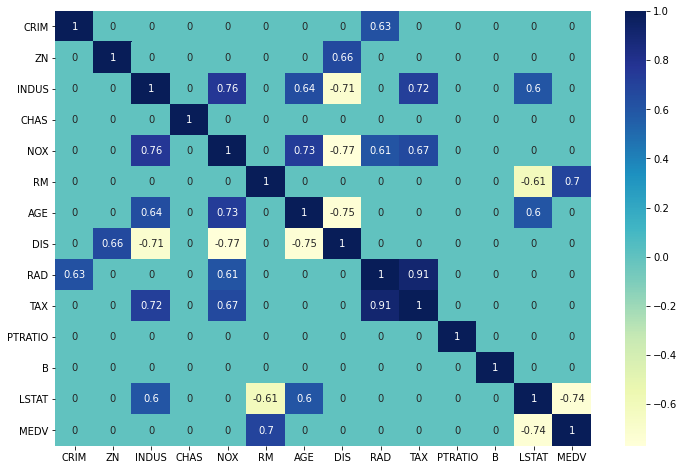

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

## Detecting Collinearity with Eigenvectors

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format
pd.Series(eigenvalues).sort_values()

8    0.0635
10   0.1693
11   0.1860
12   0.2202
9    0.2769
7    0.3961
6    0.5354
5    0.6574
4    0.8348
3    0.8576
2    1.2426
1    1.4333
0    6.1268
dtype: float64

Note that index 8, eigenvalue of 0.0635, is near to zero or very small compared to the others. Small value represents presence of collinearity.

In [ ]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9    0.7202
8    0.6335
2    0.2511
1    0.0809
0    0.0460
5    0.0456
4    0.0436
6    0.0386
3    0.0359
12   0.0244
10   0.0234
7    0.0183
11   0.0045
dtype: float64

Note that index 9, 8, 2 have very high loading when compared against the rest

In [ ]:
print(df.columns[2], df.columns[8], df.columns[9])

INDUS RAD TAX


These are the factors that are causing multicollinearity problem.

***

# Revisiting Feature Importance and Extractions

Check:

1. Direction of the coefficient
2. Impact of the variable / factor on the model

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


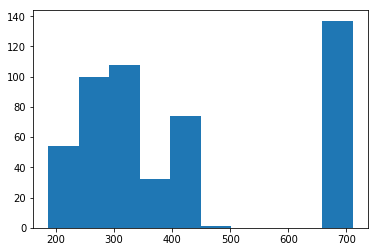

In [ ]:
plt.hist(df['TAX']);

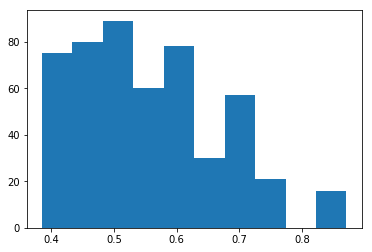

In [ ]:
plt.hist(df['NOX']);

## Standardise Variable to Identify Key Feature(s)

In order to perform point 2 properly, one needs to standardise the variable

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
NOX,17.7666
RM,3.8099
CHAS,2.6867
DIS,1.4756
PTRATIO,0.9527
LSTAT,0.5248
RAD,0.3060
CRIM,0.1080
ZN,0.0464


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
standard_coefficient_linear_reg = make_pipeline(scaler, model)

In [ ]:
standard_coefficient_linear_reg.fit(X,y)
result = pd.DataFrame(list(zip(standard_coefficient_linear_reg.steps[1][1].coef_, df.columns)),
                      columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
LSTAT,3.7436
DIS,3.1040
RM,2.6742
RAD,2.6622
TAX,2.0768
PTRATIO,2.0606
NOX,2.0567
ZN,1.0816
CRIM,0.9281


# Use $R^2$ to Identify Key Features

* Compare $R^2$ of model against $R^2$ of model without a feature.

* A significant change in $R^2$ signify the importance of the feature.




In [ ]:
from sklearn.metrics import r2_score

In [ ]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',
              data=df)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(df))

0.7406426641094094

without LSTAT

In [ ]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B',
              data=df)
lr_without_LSTAT = linear_reg.fit()
r2_score(y, lr_without_LSTAT.predict(df))

0.6842042799773889

without AGE

In [ ]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT',
              data=df)
lr_without_AGE = linear_reg.fit()
r2_score(y, lr_without_AGE.predict(df))

0.7406412165505145

***